In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# Downtown San Diego Homeless Sleepers
`sandiegodata.org-dowtown_homeless-4` Last Update: 2019-10-01T15:15:52

_Five years of monthly geographic positions for homeless sleepers in Downtown San Diego_


**NOTE: This is an early version of the data, and there are still some noteable
discrepancies versus the official Downtown San Diego Partnership counts. This
data is suitable for some exploratory analysis, but not final results. Contact
eric@sandiegodata.org for more information**

This dataset provides geographic locations for homeless sleepers in Downtown San Diego, as counted by enumerators from the Downtown San Diego Partnership. These counts have been done monthly since 2012, and this dataset provides counts since 2014. 

<center><a href="https://i2.wp.com/www.sandiegodata.org/wp-content/uploads/sites/19/2019/09/Homeless-Sleepers.png?ssl=1"><img src="https://i2.wp.com/www.sandiegodata.org/wp-content/uploads/sites/19/2019/09/Homeless-Sleepers.png?ssl=1" width="400px"></a></center>


The count is done on paper maps with handwritten count marks. The San Diego
Regional Data Library's [Downton Homelessness
project](http://downtown-homelessness.sandiegodata.org/) converted these
scanned count maps using a [web based image annotation
tool](http://www.robots.ox.ac.uk/~vgg/software/via/).


## Caveats

This is an early version of the data, and there are still some noteable
discrepancies versus the official Downtown San Diego Partnership counts. This
data is suitable for some exploratory analysis, but not final results. Contact
eric@sandiegodata.org for more information

* **This version has several months that have significant errors**:
    * August 2014 and September 2014 have the same maps; one of them is a duplicate of the other
    * Many map sets, such as Sept 2016, have no date annotations on the maps. 
    * Maps for November 2016 and October 2016 both have dates of enumeration in October 2016. The maps with enumeration dates of 2016-10-23 are in the map set for November 2016, so these dates were changed to 2016-11-1 to attribute them to November. 
    * For June 2015, the only counts are for the Gaslamp neighborhood.
* The ``total_count`` often does not match the sum of counts on the map. These sums were made by hand, by the enumerator who made the counts, so there are occasional arithmetic errors.  
* There are many instances of missing values for ``rain`` or ``temp``
* Some dates include the day of the month, but many don't These dates have a day of month of 1
* Maps marked for the 'east_village_south' neighborhood have been re-attributed to the `east_village` neighborhood.

## Versions

1. Initial Version
2. Reload upstream source, with better datatypes
3. Add monthly and neighborhood totals
4. Updated to source package


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [homeless_counts](notebooks/Counts.ipynb#homeless_counts)**. Counts of homeless sleepers in Downtown San Diego, 2014 to mid 2018.
* ** [neighborhood_totals](file:data/neighborhood_totals.csv#&encoding=ascii)**. Totals for each of the neighborhoods for 2019 and 2019, from the published Downtown San Diego Partnership statistics
* ** [monthly_totals](file:data/monthly_totals.csv#&encoding=ascii)**. Monthly totals since 2012, from the published Downtown San Diego Partnership statistics

## References
<ul><li> <strong>counts</string>, <em>metapack+http://library.metatab.org/sandiegodata.org-downtown_homeless-source-4.csv#counts</em>. Final homeless sleeper counts</li><li> <strong>files</string>, <em>metapack+http://library.metatab.org/sandiegodata.org-downtown_homeless-source-4.csv#files</em>. Final file annotations, including total counts, temperature and weather.</li><li> <strong>blocks</string>, <em>shape+https://www2.census.gov/geo/pvs/tiger2010st/06_California/06073/tl_2010_06073_tabblock10.zip</em>. 2010 Census blocks for San Diego County</li><ul>

In [30]:
display(pkg.resource('homeless_counts'))
hc = pkg.resource('homeless_counts').geoframe()
hc['date'] = pd.to_datetime(hc.date)

hc['keep'] = True
hc.loc[(hc.date.dt.month == 9) & (hc.date.dt.year == 2014),'keep'] = False
hc.loc[(hc.date.dt.month == 8) & (hc.date.dt.year == 2014),'keep'] = False
hc.loc[(hc.date.dt.month == 6) & (hc.date.dt.year == 2015),'keep'] = False
hc = hc[hc.keep]

hc.head()

Header,Type,Description
neighborhood,string,"Neighborhood, from the label on the source map"
date,date,"Date of the observation. Many dates have no know day of month; for these dates, the day of month is set to 1"
type,string,"Type of sleeper: individual, vehicle or structure"
temp,float,"Temperature, if it was written on the source map"
rain,string,"Rain or clear, if it was written on the source map"
geoid,string,"Census geoid for the 2010 Census block the observation is in, in ACS format"
x,number,"X geographic position, in California State Plane 6, EPSG:2230"
y,number,"Y geographic position, in California State Plane 6, EPSG:2230"
geometry,string,"Geographic position of observation, in Lat/Lon, EPSG:4326"


,neighborhood,date,type,temp,rain,geoid,x,y,geometry,keep
0,east_village,2015-02-26,individual,,clear,10100US060730054004017,6282705.343573073,1839575.8287548085,"POLYGON ((-117.157385 32.710435, -117.157386 3...",True
1,east_village,2017-08-31,individual,,,10100US060730054004017,6282684.9900016235,1839585.1231402815,"POLYGON ((-117.157385 32.710435, -117.157386 3...",True
2,east_village,2017-08-31,individual,,,10100US060730054004017,6282684.9900016235,1839585.1231402815,"POLYGON ((-117.157385 32.710435, -117.157386 3...",True
3,east_village,2017-10-23,individual,66,clear,10100US060730054004017,6282745.367847414,1839587.9336917363,"POLYGON ((-117.157385 32.710435, -117.157386 3...",True
4,east_village,2015-03-26,individual,,clear,10100US060730054004017,6282740.222874262,1839638.9563368256,"POLYGON ((-117.157385 32.710435, -117.157386 3...",True


Text(0.5, 1.0, 'Sleeper Count Per Month For Offical Data vs This Dataset')

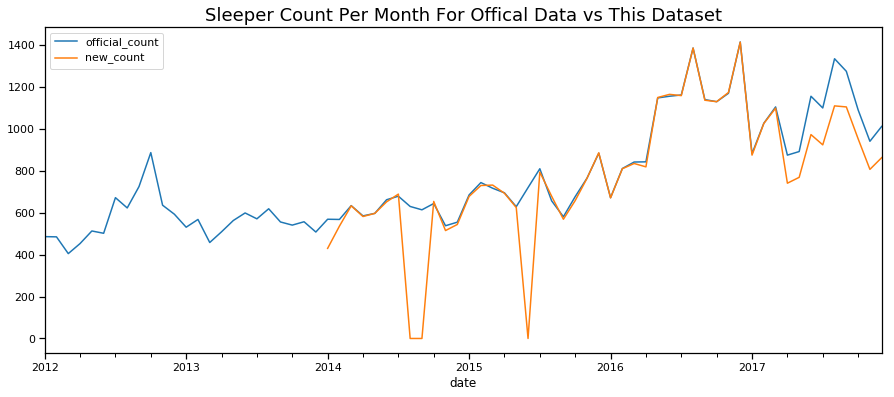

In [38]:
hc['new_count'] = 1
t = hc.set_index('date').groupby(pd.Grouper(freq="MS")).new_count.count().to_frame()
mt = pkg.resource('monthly_totals').dataframe().set_index('date').groupby(pd.Grouper(freq="MS")).sum().rename(columns={'count':'official_count'})

j = mt.join(t)
ax = j.plot(figsize=(15,6))
ax.set_title('Sleeper Count Per Month For Offical Data vs This Dataset', fontsize=18)


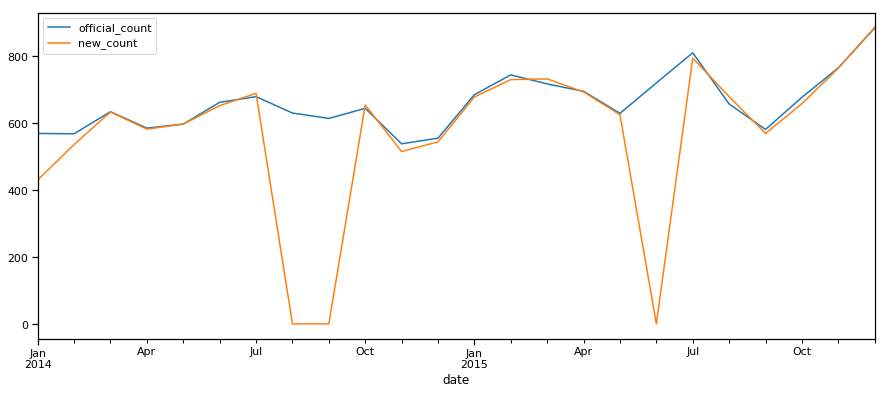

In [33]:

j.loc['2014':'2015'].plot(figsize=(15,6))

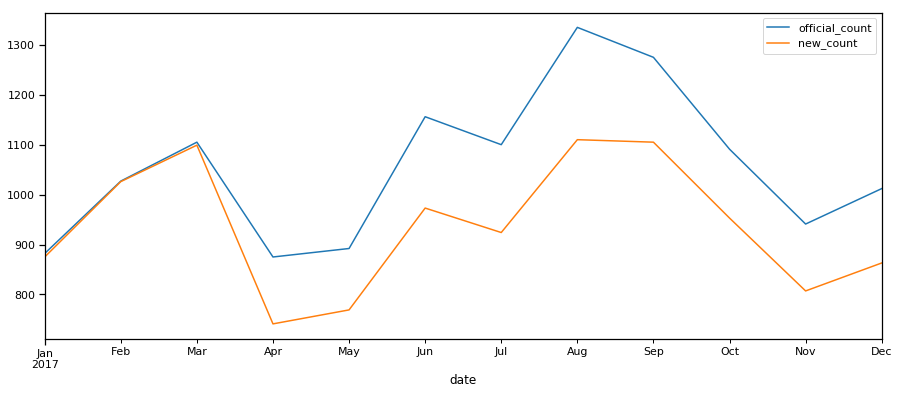

In [32]:
j.loc['2017'].plot(figsize=(15,6))